In [1]:
# This notebook was written for Python 2.7
import FlowCytometryTools as fct
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from operator import truediv
import scipy.optimize

%matplotlib inline

In [2]:
blues = sns.color_palette('Blues', 9)
reds = sns.color_palette('Reds', 9)
greens = sns.color_palette('Greens', 9)
oranges = sns.color_palette('Oranges', 9)
grays = sns.color_palette('Greys', 9)


bw = {'axis.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white',
     'grid.color': 'white', 'axes.edgecolor': 'white', 'axes.facecolor': 'black',
     'text.color': 'white', 'axes.labelcolor': 'white', 'figure.facecolor' : 'black',
     'xtick.major.size': 5.0, 'xtick.minor.size': 5.0, 
      'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 'axes.linewidth': 1.0}

bw_tickless = {'axis.labelcolor': 'white', 'grid.color': 'white', 
               'axes.edgecolor': 'white', 'axes.facecolor': 'black', 'text.color': 'white', 
               'axes.labelcolor': 'white', 'figure.facecolor' : 'black', 'axes.linewidth': 1.0,
              'xtick.color': 'white', 'ytick.color': 'white'}

## Import recovery probability data

In [3]:
df_rates = pd.DataFrame()

df_sub = pd.read_csv('raw/03_14_recovery_probability.csv', usecols = [1,2])
df_rates = pd.concat([df_rates, df_sub])

df_sub = pd.read_csv('raw/03_23_recovery_probability.csv', usecols = [1,2])
df_rates = pd.concat([df_rates, df_sub])

df_sub = pd.read_csv('raw/03_24_recovery_probability.csv', usecols = [1,2])
df_rates = pd.concat([df_rates, df_sub])

df_sub = pd.read_csv('raw/08_10_recovery_probability.csv', usecols = [1,2])
df_rates = pd.concat([df_rates, df_sub])

df_sub = pd.read_csv('raw/08_16_recovery_probability.csv', usecols = [1,2])
df_rates = pd.concat([df_rates, df_sub])

df_sub = pd.read_csv('raw/09_06_recovery_probability.csv', usecols = [1,2])
df_rates = pd.concat([df_rates, df_sub])

In [4]:
df_rates.head()
df_rates.tail()
df_rates.sample(n = 5)

,r,time
0,0.998834,0
0,0.999773,0
1,0.949569,2
5,0.273882,10
4,0.330399,8


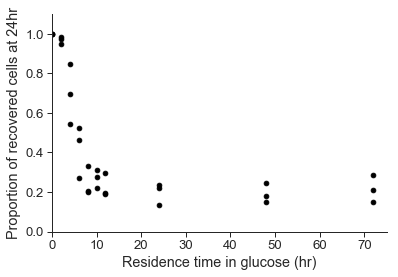

In [5]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots()

plt.scatter(df_rates['time'], df_rates['r'], color = 'black')

ax.set_xlim(0, 75)
ax.set_ylim(0, 1.1)

ax.set_xlabel('Residence time in glucose (hr)')
ax.set_ylabel('Proportion of recovered cells at 24hr')

sns.despine()

## Logistic fit

In [6]:
def func(x, a, b, c, d):
    return (a/(1.0 + np.exp(-c*(x - d)))) + b 

In [7]:
popt, pcov = scipy.optimize.curve_fit(func, df_rates['time'], df_rates['r'])
a_fit = popt[0]
b_fit = popt[1]
c_fit = popt[2]
d_fit = popt[3]

In [8]:
print(a_fit)
print(b_fit)
print(c_fit)
print(d_fit)

-0.8207649957078859
1.036254418138254
0.807853318364542
4.52600638459031


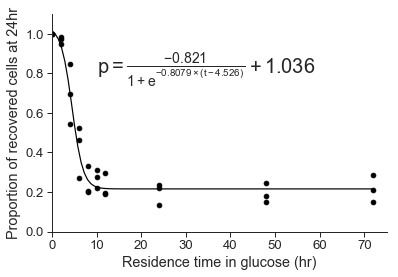

In [9]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots()

xplot = np.linspace(0, 72, 100)
yplot = func(xplot, a_fit, b_fit, c_fit, d_fit)

plt.scatter(df_rates['time'], df_rates['r'], color = 'black')
plt.plot(xplot, yplot, color = 'black')

ax.set_xlim(0, 75)
ax.set_ylim(0, 1.1)

ax.set_xlabel('Residence time in glucose (hr)')
ax.set_ylabel('Proportion of recovered cells at 24hr')

plt.text(10, 0.8, r'$\mathregular{p = \frac{-0.821}{1+e^{-0.8079 \times{(t-4.526)}}} + 1.036}$',
        fontsize = 20)

sns.despine()

In [10]:
df_24rates = df_rates[df_rates['time'] < 25]
df_48rates = df_rates[df_rates['time'] == 48]
df_72rates = df_rates[df_rates['time'] == 72]

Text(23.325,0.5,'Proportion of recovered cells at 24hr')

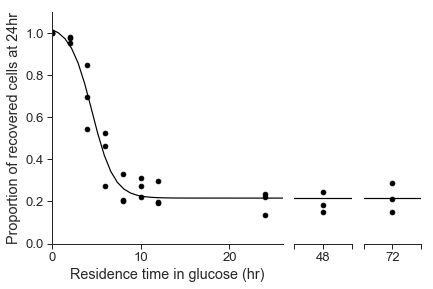

In [11]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = False, 
                                  gridspec_kw = {'width_ratios': [4, 1, 1]})
plt.tight_layout()

xplot = np.linspace(0, 73, 100)
yplot = func(xplot, a_fit, b_fit, c_fit, d_fit)

ax1.scatter(df_rates['time'], df_rates['r'], color = 'black')
ax1.plot(xplot, yplot, color = 'black');

ax2.scatter(df_rates['time'], df_rates['r'], color = 'black')
ax2.plot(xplot, yplot, color = 'black');

ax3.scatter(df_rates['time'], df_rates['r'], color = 'black')
ax3.plot(xplot, yplot, color = 'black');


#plt.text(10, 0.8, r'$\mathregular{p_{recovered} = \frac{-0.821}{1+e^{-0.8079 \times{(t-4.526)}}} + 1.036}$',
#        fontsize = 20)

ax1.set_xlim(0, 26)
ax2.set_xlim(47, 49)
ax3.set_xlim(71, 73)

ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
ax3.set_ylim(0, 1.1)

sns.despine()
ax2.spines['left'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax2.set_yticks([])
ax3.set_yticks([])
ax2.set_xticklabels(['', '48', ''])
ax3.set_xticklabels(['', '72', ''])


f.subplots_adjust(wspace = 0.1)

ax1.set_xlabel('Residence time in glucose (hr)')
ax1.set_ylabel('Proportion of recovered cells at 24hr')



In [12]:
residuals = df_rates['r'] - func(df_rates['time'], a_fit, b_fit, c_fit, d_fit)
ss_res = np.sum(residuals **2)
ss_tot = np.sum((df_rates['r'] - np.mean(df_rates['r']))**2)
rsquared = 1 - (ss_res / ss_tot)

In [13]:
rsquared

0.9537610139102691

### What does this tell us about rate-switching?
### One, the steady state reflects the steady-state proportion of recoverers:

In [14]:
asymptote = a_fit + b_fit
asymptote

0.21548942243036817

### While the slope at the half-max/sigmoid midpoint is the conversion from recoverers to arresters:

In [15]:
# The slope at the half-max is the derivative at this point (d_fit)
# The derivative is f(x)(1-f(x))
slope = func(d_fit, a_fit, b_fit, c_fit, d_fit)*(1-func(d_fit, a_fit, b_fit, c_fit, d_fit))

### The conversion from arresters to recoverers can be calculated from the above, since the ratio of the two rates must equal the steady state ratio between the two cell types:

In [16]:
print('Steady state recoverers: ' + str(asymptote))
print('Steady state arrester/recoverer ratio: ' + str((1-asymptote) / asymptote))
print('Sigmoid\'s midpoint: ' + str(d_fit) + ' hr')
print('Derivative at midpoint (recoverer>arrester rate): ' + str(slope) + ' hr-1')
print('Arrester>recoverer rate: ' + str(slope/((1-asymptote) / asymptote)) + ' hr-1')

Steady state recoverers: 0.21548942243036817
Steady state arrester/recoverer ratio: 3.6405990081630732
Sigmoid's midpoint: 4.52600638459031 hr
Derivative at midpoint (recoverer>arrester rate): 0.23415625968394005 hr-1
Arrester>recoverer rate: 0.0643180584181084 hr-1
